# Audio Signal Analysis and Feature Extraction

This notebook demonstrates how to generate a 10-second audio file, analyze its properties, and extract features using libraries like `librosa`, `numpy`, `matplotlib`, and `scipy`.

## Step 1: Create a 10-Second Audio File

In [38]:

import os
import librosa
import soundfile as sf
import matplotlib.pyplot as plt
input_file = r"C:\Users\turch\Рабочий стол\junk\InstituteProject-course--3-\Python\lab5\Yasuharu_Takanashi_-_FAIRY_TAIL_Main_Theme_-Final_version_(SkySound.cc).mp3"
audio_signal, sampling_rate = librosa.load(input_file, sr=None)

duration = 10
max_samples = duration * sampling_rate

if len(audio_signal) > max_samples:
    audio_signal = audio_signal[:max_samples]

output_directory = os.path.dirname(input_file)
output_file = os.path.join(output_directory, "fairy_audio.wav")

sf.write(output_file, audio_signal, sampling_rate)



In [39]:
audio_data = 'fairy_audio.wav'
y, sr = librosa.load(audio_data)

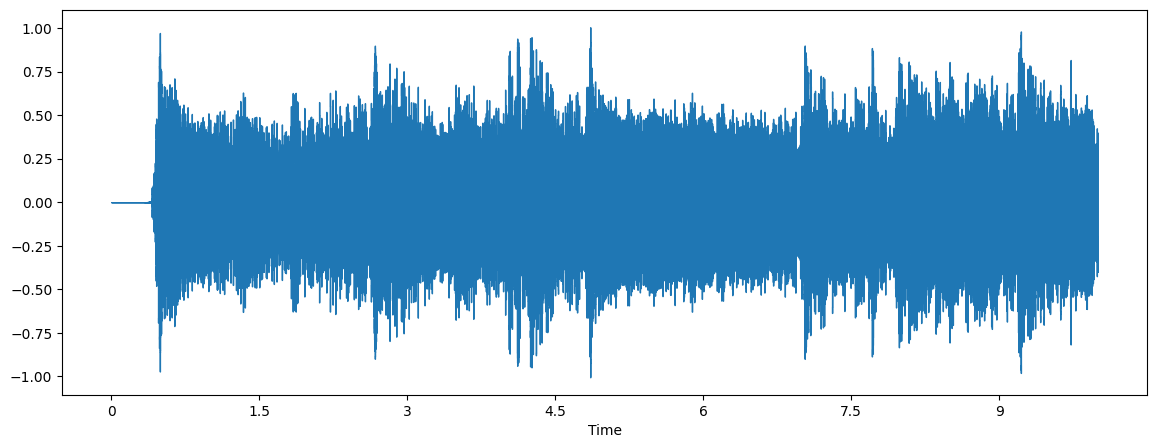

In [40]:
import IPython.display as ipd
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)
ipd.Audio(audio_data)

## Step 2: Analyze the Signal

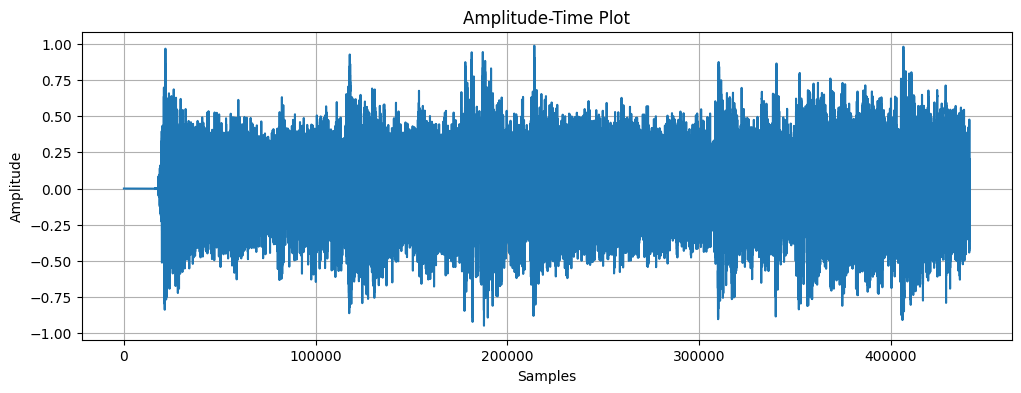

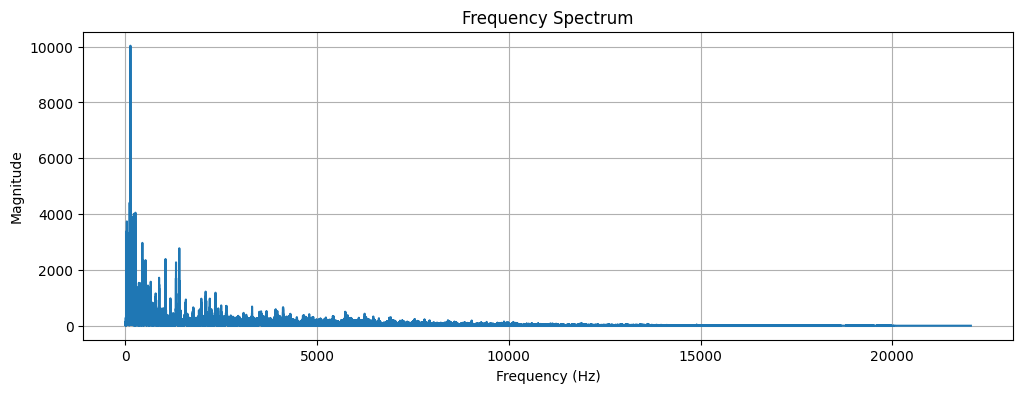

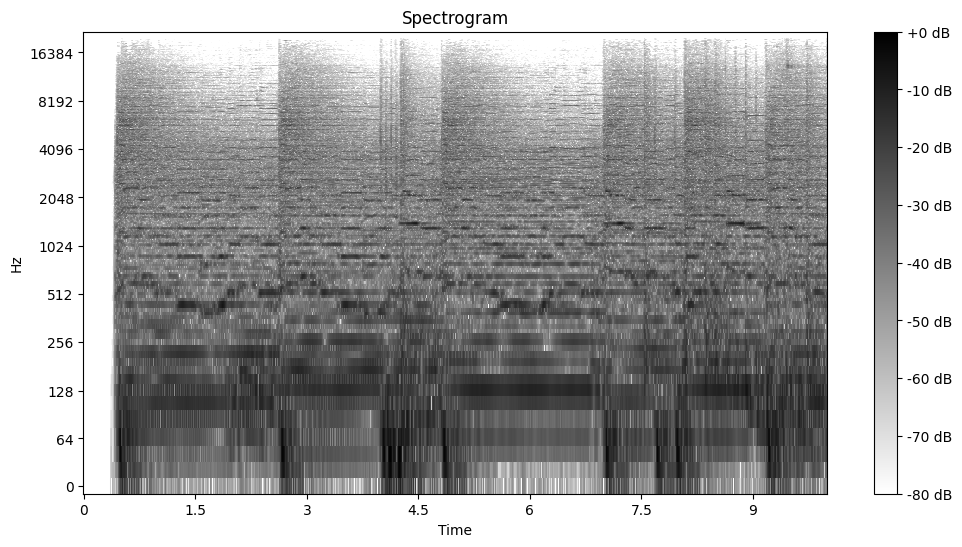

In [44]:


# Укажите путь к обрезанному аудиофайлу
audio_data = 'fairy_audio.wav'
audio_signal, sampling_rate = librosa.load(audio_data, sr=None)

# Амплитудно-временной график
plt.figure(figsize=(12, 4))
plt.plot(audio_signal)
plt.title('Amplitude-Time Plot')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

# Преобразование Фурье и частотный спектр
fft_result = np.fft.fft(audio_signal)
fft_magnitude = np.abs(fft_result)
frequencies = np.fft.fftfreq(len(fft_result), 1/sampling_rate)

plt.figure(figsize=(12, 4))
plt.plot(frequencies[:len(frequencies)//2], fft_magnitude[:len(fft_magnitude)//2])
plt.title('Frequency Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid()
plt.show()

# Спектрограмма
plt.figure(figsize=(12, 6))
D = librosa.amplitude_to_db(np.abs(librosa.stft(audio_signal)), ref=np.max)
librosa.display.specshow(D, sr=sampling_rate, x_axis='time', y_axis='log', cmap='gray_r')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()



## Step 3: Feature Extraction

Темп: [109.95678191] BPM
Количество ударов: 17


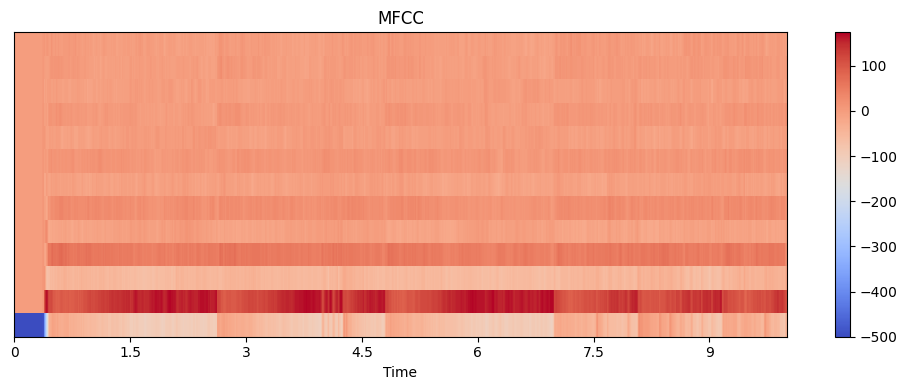

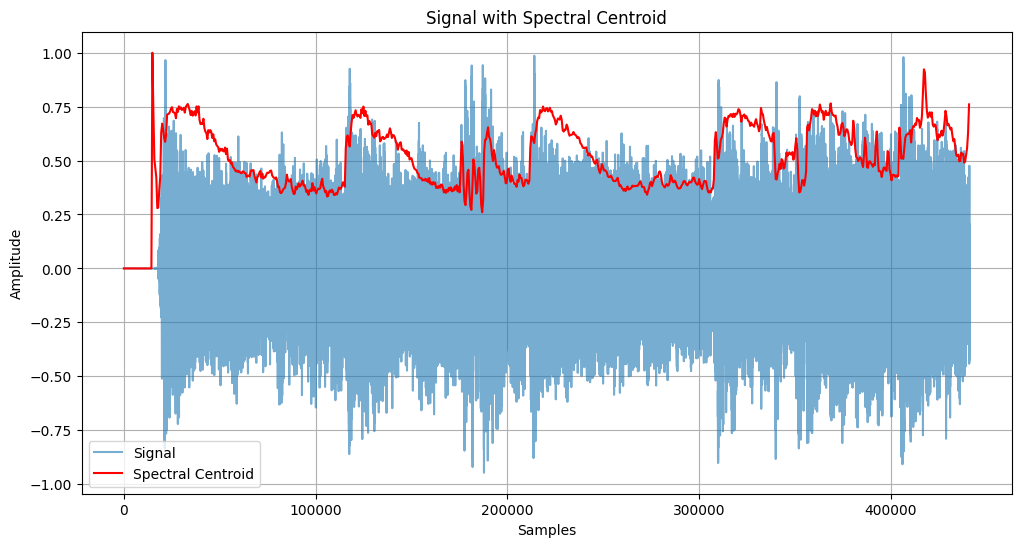

In [43]:



# Загрузка аудиофайла
audio_data = 'fairy_audio.wav'
audio_signal, sampling_rate = librosa.load(audio_data, sr=None)

# 1. Определение темпа и количества ударов
tempo, beats = librosa.beat.beat_track(y=audio_signal, sr=sampling_rate)
print(f"Темп: {tempo} BPM")
print(f"Количество ударов: {len(beats)}")

# 2. Вывод изображения массива мел-кепстральных коэффициентов (MFCCs)
mfccs = librosa.feature.mfcc(y=audio_signal, sr=sampling_rate, n_mfcc=13)
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, sr=sampling_rate, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()

# 3. Спектральный центроид и амплитудно-временная форма
spectral_centroids = librosa.feature.spectral_centroid(y=audio_signal, sr=sampling_rate)[0]
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames, sr=sampling_rate)

# Отображение амплитудно-временной формы и спектрального центроида
plt.figure(figsize=(12, 6))
plt.plot(audio_signal, alpha=0.6, label='Signal')
plt.plot(t * sampling_rate, spectral_centroids / np.max(spectral_centroids), color='r', label='Spectral Centroid')
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.title("Signal with Spectral Centroid")
plt.legend()
plt.grid()
plt.show()



## Теоретическое объяснение

### Гармонические и ударные сигналы:
- **Гармонические компоненты**: это непрерывные тоны с четкой высотой тона (например, музыкальные ноты фортепиано или скрипки). Они, как правило, имеют отчетливые гармонические структуры с основными частотами и обертонами.
- **Ударные компоненты**: это переходные звуки с резкими, быстрыми всплесками энергии (например, удары барабана, хлопки). Ударные элементы не поддерживают тон, а вместо этого производят короткие и сильные амплитудные пики.

### Важность:
Определение гармонических и ударных элементов необходимо для различных приложений, таких как:
1. **Классификация музыкальных жанров**: гармонические звуки часто определяют мелодию, в то время как ударные элементы способствуют ритму.
2. **Музыкальная транскрипция**: разделение этих элементов может помочь создать более точные транскрипции.
3. **Звуковые эффекты**: улучшение ударных звуков в аудиопроизводстве для битов и звуковых эффектов.